# House Prices Dataset Exploration

## Dataset Overview

We are working with the **House Prices** dataset from OpenML, which contains information about residential properties and their sale prices. This dataset is commonly used for regression tasks and feature engineering practice.

### Dataset Characteristics
- **Total Records**: 1,460 houses
- **Total Features**: 81 columns (including the target variable `SalePrice`)
- **Target Variable**: `SalePrice` - the sale price of each house
- **Feature Types**: Mix of numeric and categorical variables including property dimensions, condition ratings, amenities, and sale details

### Key Features Include
- Property basics: `LotArea`, `YearBuilt`, `BldgType`, `HouseStyle`
- Quality indicators: `OverallQual`, `OverallCond`, `ExterQual`, `KitchenQual`
- Structural components: basement, garage, porch measurements
- Categorical attributes: zoning, neighborhood, sale type, and condition

## Exploration Methods

Our analysis will follow this structured approach:

1. **Data Structure Inspection** - Examine column names, data types, and dimensions
2. **Missing Value Analysis** - Identify and assess the extent of missing data
3. **Descriptive Statistics** - Calculate summary statistics for numeric features
4. **Distribution Analysis** - Visualize feature distributions and identify outliers
5. **Correlation Analysis** - Explore relationships between features and the target variable
6. **Categorical Feature Analysis** - Examine unique values and distributions of categorical variables
7. **Data Quality Assessment** - Check for inconsistencies and data anomalies

This systematic approach will help us understand the data before building predictive models.

In [21]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [22]:
# Fetch data and convert to DataFrame
data = fetch_openml(name="house_prices", as_frame=True)
df = data.frame

In [26]:
# Show the first few rows of the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:

# Show column/features of the DataFrame
for f, i in zip(df.columns, range(1, len(df.columns))):
    print("Feature {i}: {f}".format(i=i, f=f))

Feature 1: Id
Feature 2: MSSubClass
Feature 3: MSZoning
Feature 4: LotFrontage
Feature 5: LotArea
Feature 6: Street
Feature 7: Alley
Feature 8: LotShape
Feature 9: LandContour
Feature 10: Utilities
Feature 11: LotConfig
Feature 12: LandSlope
Feature 13: Neighborhood
Feature 14: Condition1
Feature 15: Condition2
Feature 16: BldgType
Feature 17: HouseStyle
Feature 18: OverallQual
Feature 19: OverallCond
Feature 20: YearBuilt
Feature 21: YearRemodAdd
Feature 22: RoofStyle
Feature 23: RoofMatl
Feature 24: Exterior1st
Feature 25: Exterior2nd
Feature 26: MasVnrType
Feature 27: MasVnrArea
Feature 28: ExterQual
Feature 29: ExterCond
Feature 30: Foundation
Feature 31: BsmtQual
Feature 32: BsmtCond
Feature 33: BsmtExposure
Feature 34: BsmtFinType1
Feature 35: BsmtFinSF1
Feature 36: BsmtFinType2
Feature 37: BsmtFinSF2
Feature 38: BsmtUnfSF
Feature 39: TotalBsmtSF
Feature 40: Heating
Feature 41: HeatingQC
Feature 42: CentralAir
Feature 43: Electrical
Feature 44: 1stFlrSF
Feature 45: 2ndFlrSF
Featu

In [45]:
unique_dt = set(df.dtypes)
print("Unique data types in the dataset:", unique_dt)

Unique data types in the dataset: {dtype('int64'), dtype('float64'), <StringDtype(na_value=nan)>}


In [46]:
# Basic structure and types
df.shape

(1460, 81)

In [47]:
# Column data types and non-null counts
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

In [48]:
# Missing value analysis
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_summary = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
missing_summary = missing_summary.query('missing_count > 0')
missing_summary.head(20)


,missing_count,missing_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageFinish,81,5.55
GarageQual,81,5.55
GarageYrBlt,81,5.55
GarageType,81,5.55


In [49]:
# Descriptive statistics for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [50]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print('Numeric columns:', len(numeric_cols))
print('Categorical columns:', len(categorical_cols))

Numeric columns: 38
Categorical columns: 43


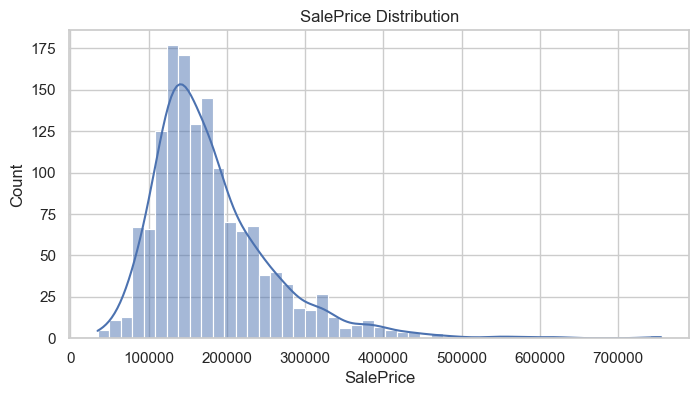

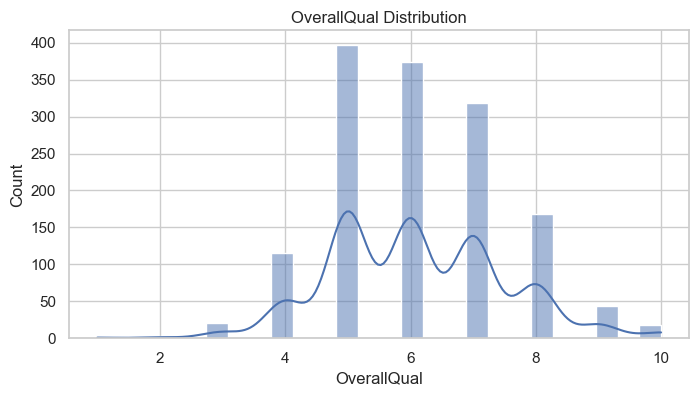

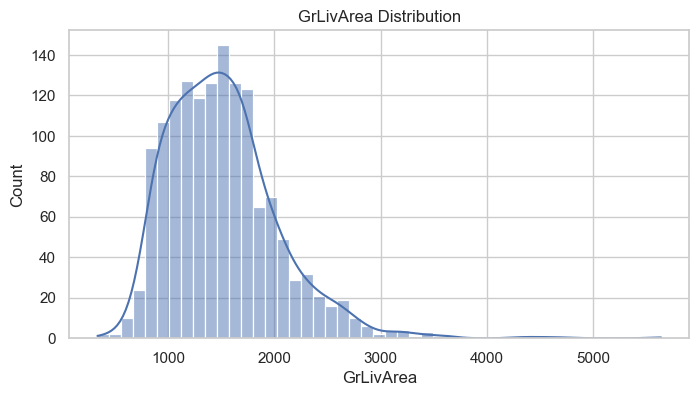

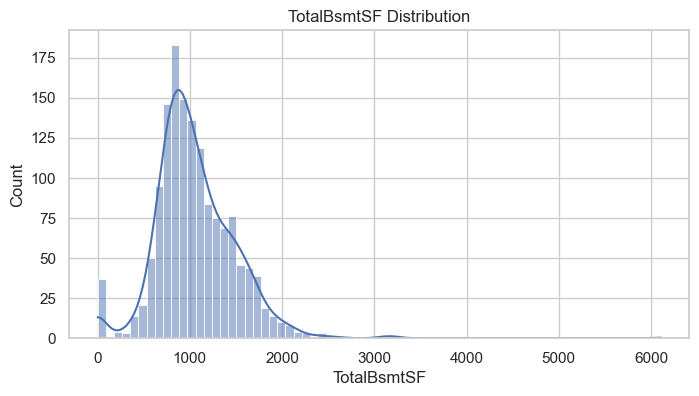

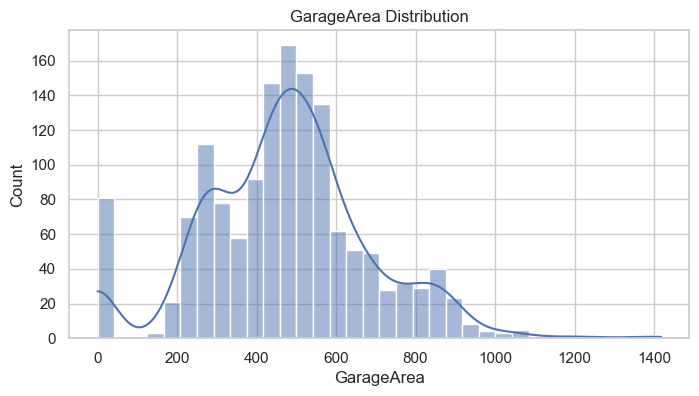

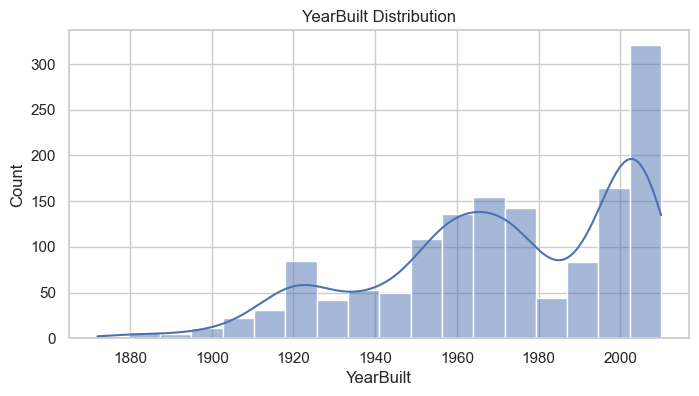

In [53]:
# Distribution analysis for target and key numeric features
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

key_numeric = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution')
        plt.show()


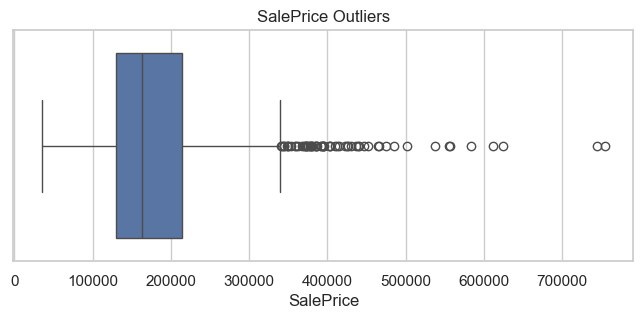

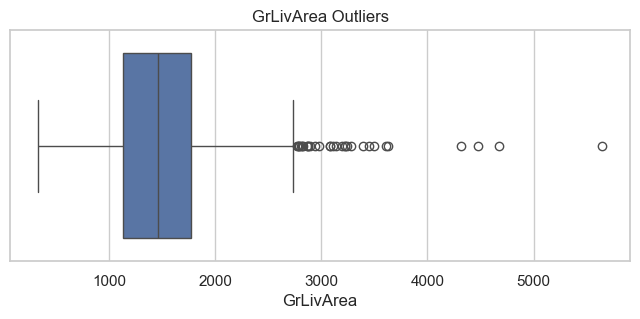

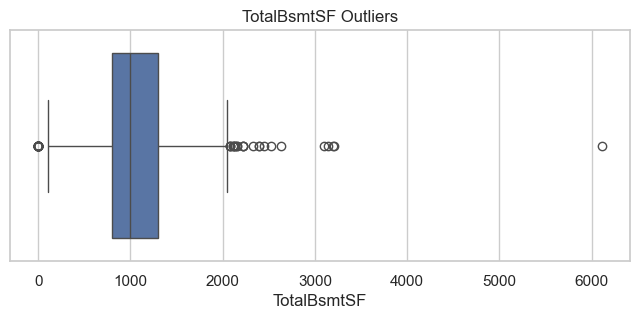

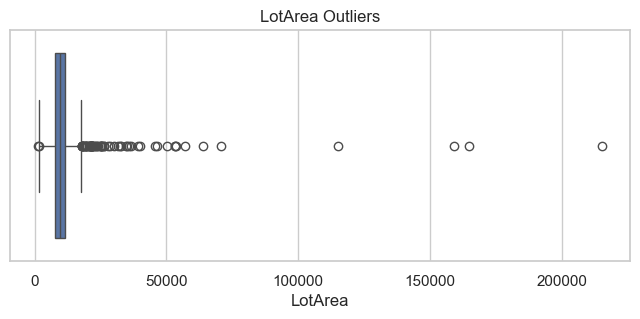

In [54]:
# Boxplots to identify outliers for key numeric features
for col in ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea']:
    if col in df.columns:
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=df[col])
        plt.title(f'{col} Outliers')
        plt.show()

In [55]:
# Correlation analysis with target
numeric_df = df.select_dtypes(include=['number'])
corr_with_target = numeric_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr_with_target.head(15)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

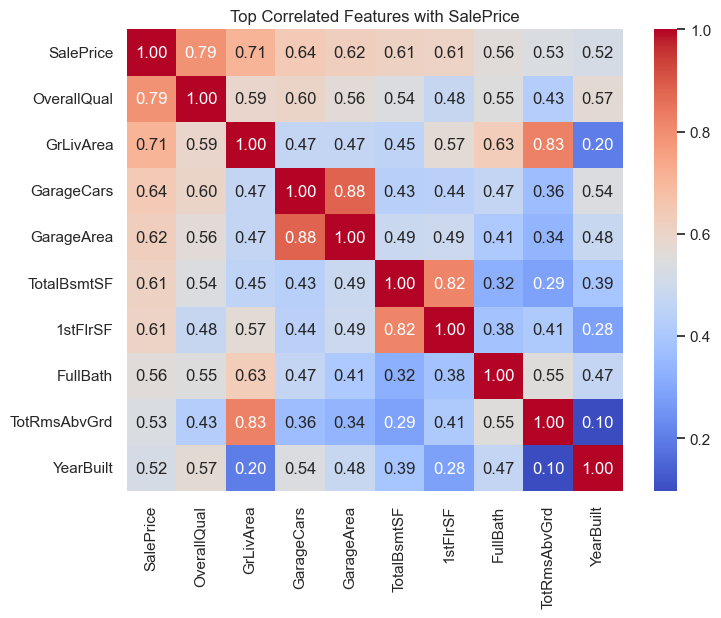

In [56]:
# Heatmap of top correlated features
top_corr_features = corr_with_target.head(10).index
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df[top_corr_features].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features with SalePrice')
plt.show()


In [57]:
# Categorical feature analysis: top categories and counts
for col in categorical_cols[:10]:
    print(f'\n{col} value counts:')
    display(df[col].value_counts(dropna=False).head(10))



MSZoning value counts:


MSZoning
RL           1151
RM            218
FV             65
RH             16
'C (all)'      10
Name: count, dtype: int64


Street value counts:


Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Alley value counts:


Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64


LotShape value counts:


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


LandContour value counts:


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Utilities value counts:


Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


LotConfig value counts:


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


LandSlope value counts:


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Neighborhood value counts:


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64


Condition1 value counts:


Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

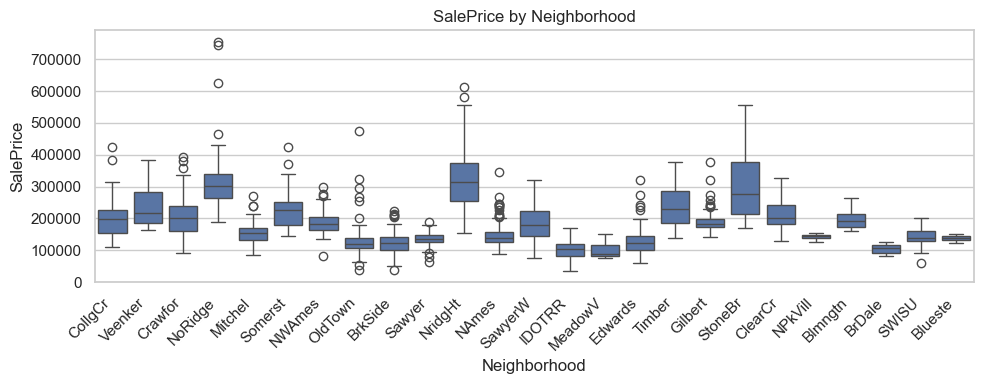

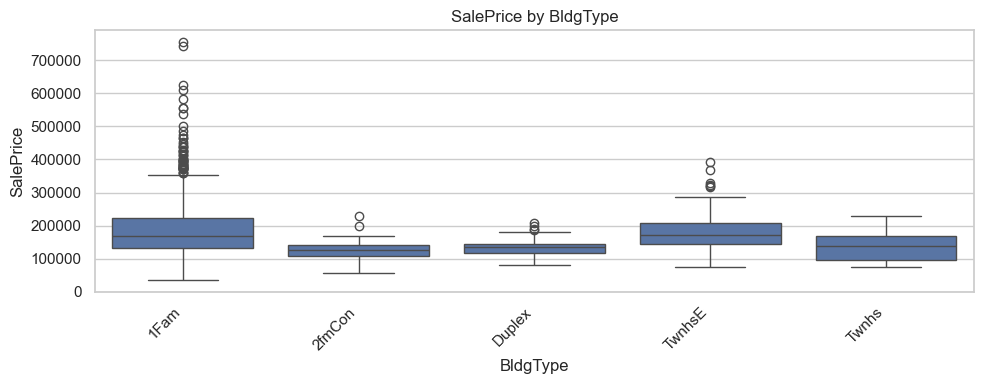

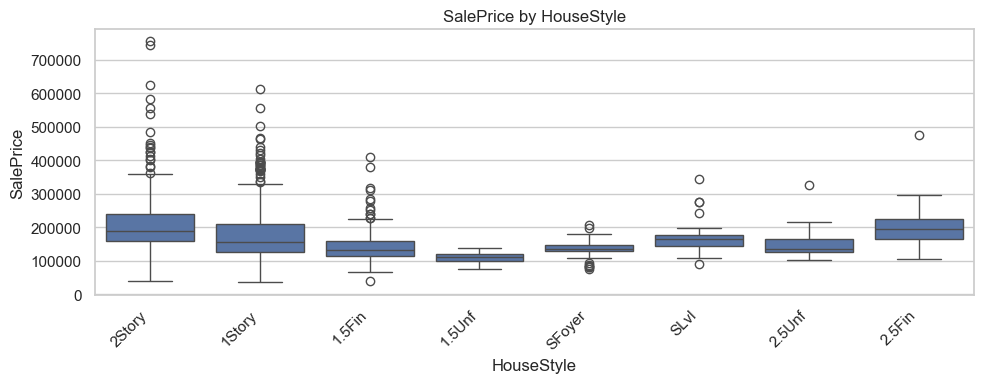

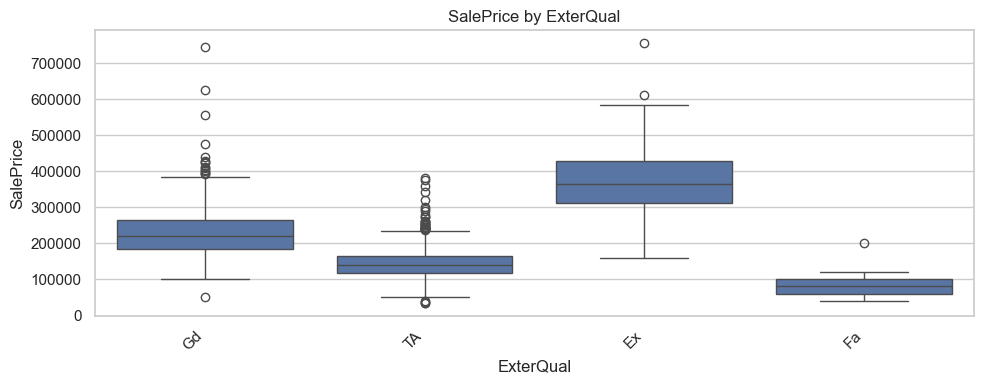

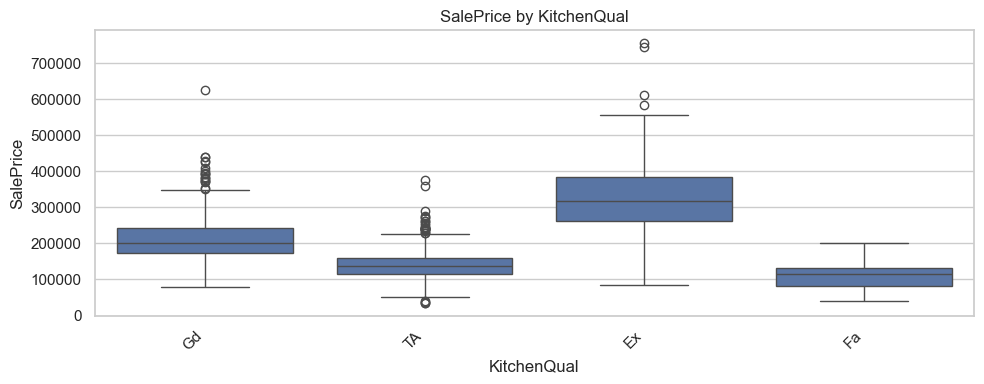

In [58]:
# Relationship between key categorical features and SalePrice
for col in ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'KitchenQual']:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=col, y='SalePrice', data=df)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'SalePrice by {col}')
        plt.tight_layout()
        plt.show()


In [59]:
# Data quality checks
duplicate_count = df.duplicated().sum()
print('Duplicate rows:', duplicate_count)

# Basic sanity checks for numerical ranges
print('Min/Max YearBuilt:', df['YearBuilt'].min(), df['YearBuilt'].max())
print('Min/Max SalePrice:', df['SalePrice'].min(), df['SalePrice'].max())


Duplicate rows: 0
Min/Max YearBuilt: 1872 2010
Min/Max SalePrice: 34900 755000
